In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set seed for reproducibility
np.random.seed(42)

# Configuration
n_rows = 1000
anomaly_ratio = 0.07  # ~7% anomalies
file_name = "synthetic_motor_data.csv"

# 1. Generate Timestamps (1-second intervals)
start_time = datetime.now()
timestamps = [start_time + timedelta(seconds=i) for i in range(n_rows)]

# 2. Generate Normal Data (using normal distributions)
# Using loc (mean) and scale (std dev) to stay within your ranges
temperature = np.random.normal(loc=40, scale=2, size=n_rows)
current = np.random.normal(loc=1.5, scale=0.1, size=n_rows)
rpm = np.random.normal(loc=1500, scale=15, size=n_rows)

# 3. Initialize Labels (0 = Normal)
labels = np.zeros(n_rows, dtype=int)

# 4. Inject Anomalies
n_anomalies = int(n_rows * anomaly_ratio)
anomaly_indices = np.random.choice(n_rows, n_anomalies, replace=False)

for i in anomaly_indices:
    labels[i] = 1
    # Randomly choose which type of fault occurs
    fault_type = np.random.choice(['overheat', 'overcurrent', 'speed_surge'])

    if fault_type == 'overheat':
        temperature[i] = np.random.uniform(60, 85)
    elif fault_type == 'overcurrent':
        current[i] = np.random.uniform(3.0, 5.0)
    elif fault_type == 'speed_surge':
        # Randomly choose high or low speed anomaly
        rpm[i] = np.random.choice([np.random.uniform(800, 1100),
                                   np.random.uniform(1750, 2000)])

# 5. Create DataFrame and Save
df = pd.DataFrame({
    'timestamp': timestamps,
    'temperature_C': np.round(temperature, 2),
    'current_A': np.round(current, 2),
    'rpm': np.round(rpm, 0).astype(int),
    'anomaly_label': labels
})

df.to_csv(file_name, index=False)
print(f"Dataset successfully saved to {file_name}")
print(f"Total anomalies injected: {df['anomaly_label'].sum()}")

Dataset successfully saved to synthetic_motor_data.csv
Total anomalies injected: 70


In [3]:
df.head()

,timestamp,temperature_C,current_A,rpm,anomaly_label
0,2026-02-13 06:14:38.637510,40.99,1.64,1490,0
1,2026-02-13 06:14:39.637510,39.72,1.59,1498,0
2,2026-02-13 06:14:40.637510,41.30,1.51,1488,0
3,2026-02-13 06:14:41.637510,43.05,1.44,1495,0
4,2026-02-13 06:14:42.637510,39.53,1.57,1472,0


In [4]:
df['anomaly_label'].value_counts()

,count
anomaly_label,
0,930
1,70


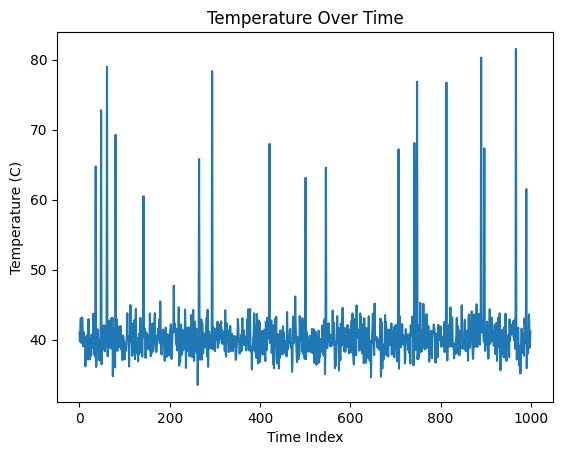

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df['temperature_C'])
plt.title("Temperature Over Time")
plt.xlabel("Time Index")
plt.ylabel("Temperature (C)")
plt.show()
